In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [62]:
#Functions
def EvaluatePolynomial(Coefficients, X):
    """
    Input:
    Coefficients is an array of numbers of any lenght, to be interpreted as coefficients of a ploynomial
    X is the variable value to be evaluated
    """
    Value = 0
    MaxExponent = len(Coefficients) - 1
    for i, Coefficient in enumerate(Coefficients):
        TemporalValue = 1
        for j in range(MaxExponent - i):
            TemporalValue = TemporalValue * X
        Value += Coefficient * TemporalValue
    return Value

def JitteryEvaluatePolynomial(Coefficients, X, J):
    """
    Input:
    Coefficients is an array of numbers of any lenght, to be interpreted as coefficients of a ploynomial
    X is the variable value to be evaluated
    J establishes a domain from -J to J to add noise to the evaluation
    """
    Value = EvaluatePolynomial(Coefficients, X)
    Jitter = random.uniform(-J,J)
    return Value + Jitter

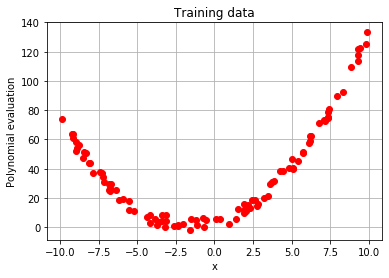

In [63]:
#Input variables
Coefficients = [1,3,3]
Interval = [-10,10]
Size = 100
J = 5

#Calculations
X = np.array([random.uniform(Interval[0],Interval[1]) for _ in range(Size)])
Y = np.array([JitteryEvaluatePolynomial(Coefficients, x, J) for x in X])

#Plot
plt.plot(X, Y, 'ro')
plt.grid()
plt.title("Training data")
plt.xlabel("x")
plt.ylabel("Polynomial evaluation")
plt.show()

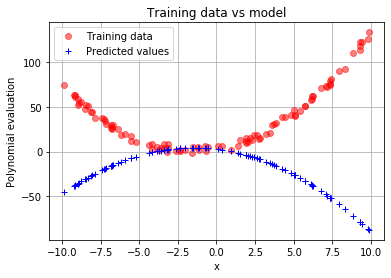

In [64]:
Parameters = len(Coefficients)
ModelCoefficients = [random.uniform(-3,3) for _ in range(Parameters)]
Ymodel = EvaluatePolynomial(ModelCoefficients, X)
plt.title("Training data vs model")
plt.plot(X, Y, 'ro', label = "Training data", alpha = 0.5)
plt.plot(X, Ymodel, 'b+', label = "Predicted values")
plt.xlabel("x")
plt.ylabel("Polynomial evaluation")
plt.legend()
plt.grid()
plt.show()

In [65]:
def MSE(Y, Ymodel):
    """
    Calculates the Mean Squared Error of the given same lenght lists
    """
    N = len(Y)
    Value = sum([(Y[i] - Ymodel[i]) ** 2 for i in range(N)]) / N
    return Value

print(MSE(Y, Ymodel))

6727.462052037881


In [66]:
def CalculateGradient(Coefficients, X, Y):
    """
    Given the Coefficients, X and Y as arrays, returns the gradient
    """
    Ymodel = EvaluatePolynomial(Coefficients, X)
    N = len(X)
    MaxExponent = len(Coefficients) - 1
    G = [(-2 / N) * sum([pow((X[i]), MaxExponent - j) * (Y[i] - Ymodel[i]) for i in range(N)]) for j in range(MaxExponent + 1)]
    return G

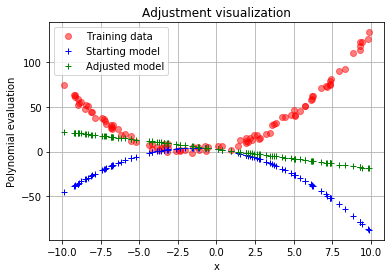

In [67]:
LearningRate = 0.0001
Gradient = CalculateGradient(ModelCoefficients, X, Y)
NewModelCoefficients = [ModelCoefficients[i] - LearningRate * Gradient[i] for i in range(len(ModelCoefficients))]
NewYmodel = EvaluatePolynomial(NewModelCoefficients, X)
plt.title("Adjustment visualization")
plt.plot(X, Y, 'ro', label = "Training data", alpha = 0.5)
plt.plot(X, Ymodel, 'b+', label = "Starting model")
plt.plot(X, NewYmodel, 'g+', label = "Adjusted model")
plt.xlabel("x")
plt.ylabel("Polynomial evaluation")
plt.legend()
plt.grid()
plt.show()

In [68]:
MaxIterations = 500
HistoricalError = []
for i in range(MaxIterations):
    Ymodel = EvaluatePolynomial(ModelCoefficients, X)
    HistoricalError.append(MSE(Y, Ymodel))
    Gradient = CalculateGradient(ModelCoefficients, X, Y)
    ModelCoefficients = [ModelCoefficients[i] - LearningRate * Gradient[i] for i in range(len(ModelCoefficients))]

Calculated coefficients:  [0.9980161003662458, 2.8206667359084725, 2.8086517306108436]
Original coefficients:  [1, 3, 3]


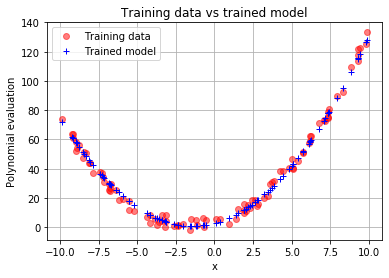

In [69]:
print("Calculated coefficients: ", ModelCoefficients)
print("Original coefficients: ", Coefficients)
plt.plot(X, Y, 'ro',label = "Training data", alpha = 0.5)
plt.plot(X, Ymodel, 'b+', label = "Trained model")
plt.grid()
plt.title("Training data vs trained model")
plt.xlabel("x")
plt.ylabel("Polynomial evaluation")
plt.legend()
plt.show()

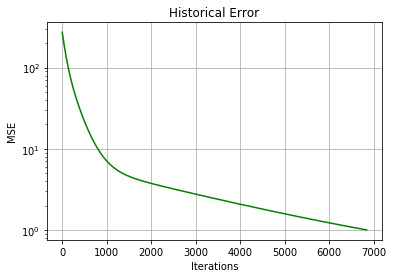

In [81]:
plt.plot(HistoricalError, 'g-')
plt.grid()
plt.title("Historical Error")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.yscale("log")
plt.show()